# Temperature Forecast Project using ML
Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



Note: Use the link below to download the dataset. 

Downlaod Files:
https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

# Import necessary Python Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
	

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objs as go

import pickle
import warnings
warnings.filterwarnings('ignore')

# DATA EXPLORATION

In [2]:
#loadindg the data set
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
#print first 5 rows of the dataset
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
#Data Summary
df.shape

(7752, 25)

In [4]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [5]:
#There are null values in almost all the columns apart from lat,lon,Slope and Solar radiation

In [6]:
#find duplicates
df.duplicated().sum()

0

In [7]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

Date                 object
Next_Tmin           float64
LDAPS_CC2           float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC3           float64
Next_Tmax           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
station             float64
dtype: object

In [8]:
#Date is an object datatype ; rest all are INT/FLOAT

In [9]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of station 

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64
*******************************************************
*******************************************************
Value counts of Date 

23-07-2016    25
18-08-2017    25
07-08-2015    25
05-07-2015    25
20-07-2017    25
              ..
10-08-2013    25
12-08-2014    25
10-07-2013    25
22-08-2016    25
18-07-2014    25
Name: Date, Length: 310, dtype: int64
*******************************************************
*******************************************************
Value counts of Present_Tmax 

31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.4      1
20.

# TREATING NULL VALUES

In [10]:
#we will first find where all the 75 rows of LDAPS features are all Null and drop them

In [11]:
df[df['LDAPS_RHmin'].isnull() & df['LDAPS_RHmax'].isnull() & df['LDAPS_Tmax_lapse'].isnull() & df['LDAPS_Tmin_lapse'].isnull() & df['LDAPS_WS'].isnull() & df['LDAPS_LH'].isnull() & df['LDAPS_CC1'].isnull() & df['LDAPS_CC2'].isnull() & df['LDAPS_CC3'].isnull() & df['LDAPS_CC4'].isnull() & df['LDAPS_PPT1'].isnull() & df['LDAPS_PPT2'].isnull() & df['LDAPS_PPT3'].isnull() & df['LDAPS_PPT4'].isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1025,1.0,10-08-2013,27.1,24.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6046,126.991,212.3350,2.7850,5304.412598,31.4,22.3
1026,2.0,10-08-2013,29.7,25.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6046,127.032,44.7624,0.5141,5162.595703,34.3,23.2
1027,3.0,10-08-2013,29.1,25.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5776,127.058,33.3068,0.2661,5157.235352,33.9,24.0
1028,4.0,10-08-2013,30.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6450,127.022,45.7160,2.5348,5148.043945,34.9,24.5
1029,5.0,10-08-2013,29.7,25.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5507,127.135,35.0380,0.5055,5147.667969,32.9,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,21.0,20-08-2016,34.1,27.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5507,127.040,26.2980,0.5721,4795.120117,35.5,27.5
5946,22.0,20-08-2016,34.3,27.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5102,127.086,21.9668,0.1332,4782.181641,36.2,27.5
5947,23.0,20-08-2016,34.6,28.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5372,126.891,15.5876,0.1554,4783.152832,37.3,28.8
5948,24.0,20-08-2016,35.0,28.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5237,126.909,17.2956,0.2223,4778.877930,37.0,28.7


In [12]:
df.drop(df.index[df['LDAPS_RHmin'].isnull() & df['LDAPS_RHmax'].isnull() & df['LDAPS_Tmax_lapse'].isnull() & df['LDAPS_Tmin_lapse'].isnull() & df['LDAPS_WS'].isnull() & df['LDAPS_LH'].isnull() & df['LDAPS_CC1'].isnull() & df['LDAPS_CC2'].isnull() & df['LDAPS_CC3'].isnull() & df['LDAPS_CC4'].isnull() & df['LDAPS_PPT1'].isnull() & df['LDAPS_PPT2'].isnull() & df['LDAPS_PPT3'].isnull() & df['LDAPS_PPT4'].isnull()], inplace=True)

In [13]:
df.shape

(7677, 25)

In [14]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [15]:
#we will do the same with Present Tmax and Tmin columns and drop the rows where both these are null

In [16]:
df[df['Present_Tmax'].isnull() & df['Present_Tmin'].isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
225,1.0,09-07-2013,NaN,NaN,70.051193,99.668961,27.872808,22.907420,11.017837,44.002020,...,0.036680,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5925.883789,23.4,22.0
271,22.0,10-07-2013,NaN,NaN,72.196007,95.168205,28.097980,24.510159,8.374849,38.782242,...,0.007261,0.000000,0.000000,37.5102,127.086,21.9668,0.1332,5772.487305,26.1,24.1
300,1.0,12-07-2013,NaN,NaN,95.027298,99.209839,24.078120,21.866817,8.543768,9.371270,...,5.055660,1.347418,0.980052,37.6046,126.991,212.3350,2.7850,5893.265625,23.2,20.5
450,1.0,18-07-2013,NaN,NaN,60.891193,94.747780,29.195536,23.236973,10.881031,79.349271,...,0.000000,0.000000,0.057358,37.6046,126.991,212.3350,2.7850,5812.293457,27.6,21.8
464,15.0,18-07-2013,NaN,NaN,52.795406,83.902847,31.480089,25.607262,8.995135,26.022306,...,0.000000,0.000000,0.008702,37.5507,126.937,30.0464,0.8552,5681.875000,30.7,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,5.0,24-08-2017,NaN,NaN,38.403931,94.790405,29.929818,22.127591,5.817882,145.726477,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,4677.062012,31.3,21.5
7596,22.0,24-08-2017,NaN,NaN,33.681381,91.842178,30.826400,22.978260,5.994230,103.179477,...,0.000000,0.000000,0.000000,37.5102,127.086,21.9668,0.1332,4672.853027,31.6,22.4
7605,6.0,25-08-2017,NaN,NaN,24.100304,76.861076,28.999651,20.800666,6.511712,71.307767,...,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,4653.651855,29.5,21.5
7629,5.0,26-08-2017,NaN,NaN,43.755058,83.340240,25.842338,18.532986,4.926595,97.230757,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,4602.118164,26.1,17.9


In [17]:
df.drop(df.index[df['Present_Tmax'].isnull() & df['Present_Tmin'].isnull()], inplace=True)

In [18]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           17
Next_Tmin           17
dtype: int64

In [19]:
df.shape

(7607, 25)

In [20]:
#for the rest of the null values are not much common and hence shall drop all the null values

In [21]:
df=df.dropna()

In [22]:
df.shape

(7588, 25)

In [23]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [24]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [25]:
#converting date column to day,month and year column and then drop the original date column

In [26]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)

In [27]:
df.drop(["Date"], axis = 1, inplace = True)

In [28]:
df.tail()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,8,30,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,8,30,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,8,30,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,8,30,2017
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.2713,4451.345215,27.8,17.4,8,30,2017


In [29]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

LDAPS_PPT1          float64
LDAPS_CC4           float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
station             float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Day                   int64
Month                 int64
Year                  int64
dtype: object

In [30]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,7.068134,16.337375,2014.991697
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,2.242389,8.216880,1.410877
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,1.000000,7.000000,2013.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,7.000000,8.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,7.000000,16.000000,2015.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,8.000000,24.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,12.000000,31.000000,2017.000000


In [31]:
#all the features have std<mean and hence seem to have a good distribution

<AxesSubplot:>

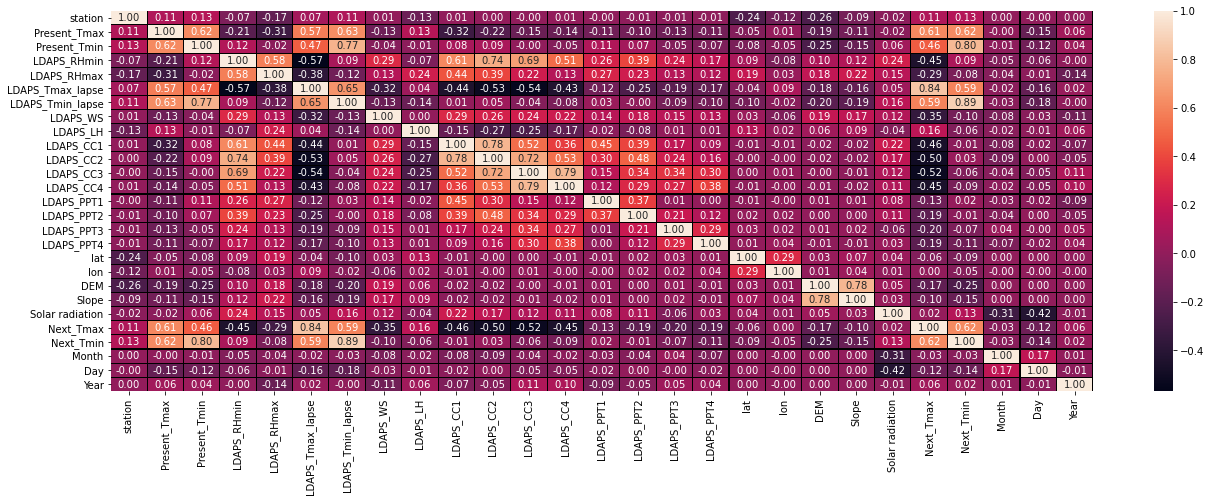

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [33]:
#Correlation with the target column
corr_mat=np.abs(df.corr())
corr_mat['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.835729
Next_Tmin           0.616629
Present_Tmax        0.610357
LDAPS_Tmin_lapse    0.592119
LDAPS_CC3           0.523061
LDAPS_CC2           0.498295
Present_Tmin        0.463523
LDAPS_CC1           0.459705
LDAPS_CC4           0.454039
LDAPS_RHmin         0.446824
LDAPS_WS            0.351107
LDAPS_RHmax         0.289788
LDAPS_PPT3          0.203554
LDAPS_PPT4          0.190720
LDAPS_PPT2          0.186722
DEM                 0.174578
LDAPS_LH            0.156779
LDAPS_PPT1          0.125954
Day                 0.122303
station             0.107747
Slope               0.104279
Year                0.061211
lat                 0.055367
Month               0.033684
Solar radiation     0.016145
lon                 0.003502
Name: Next_Tmax, dtype: float64

In [34]:
#Correlation with the target column
corr_mat=np.abs(df.corr())
corr_mat['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.886513
Present_Tmin        0.796975
Present_Tmax        0.621048
Next_Tmax           0.616629
LDAPS_Tmax_lapse    0.589963
DEM                 0.249303
Slope               0.148379
Day                 0.135865
station             0.128184
Solar radiation     0.125517
LDAPS_PPT4          0.114900
LDAPS_WS            0.102021
LDAPS_RHmin         0.093249
LDAPS_CC4           0.086197
lat                 0.085136
LDAPS_RHmax         0.076415
LDAPS_PPT3          0.068664
LDAPS_LH            0.060392
LDAPS_CC3           0.056490
lon                 0.045758
LDAPS_CC2           0.030358
Month               0.028344
Year                0.021617
LDAPS_PPT1          0.018031
LDAPS_CC1           0.012877
LDAPS_PPT2          0.012462
Name: Next_Tmin, dtype: float64

# DIVIDE DATA INTO FEATURES & LABEL

In [35]:
#since we are supposed to predict 2 variables, we will add both the variables in the target variable

In [36]:
#dividing the columns in feature and label
X = df.drop(columns=['Next_Tmin','Next_Tmax'])
y = df[['Next_Tmin','Next_Tmax']].to_numpy()

In [37]:
y

array([[21.2, 29.1],
       [22.5, 30.5],
       [23.9, 31.1],
       ...,
       [18.1, 28.3],
       [18.8, 28.6],
       [17.4, 27.8]])

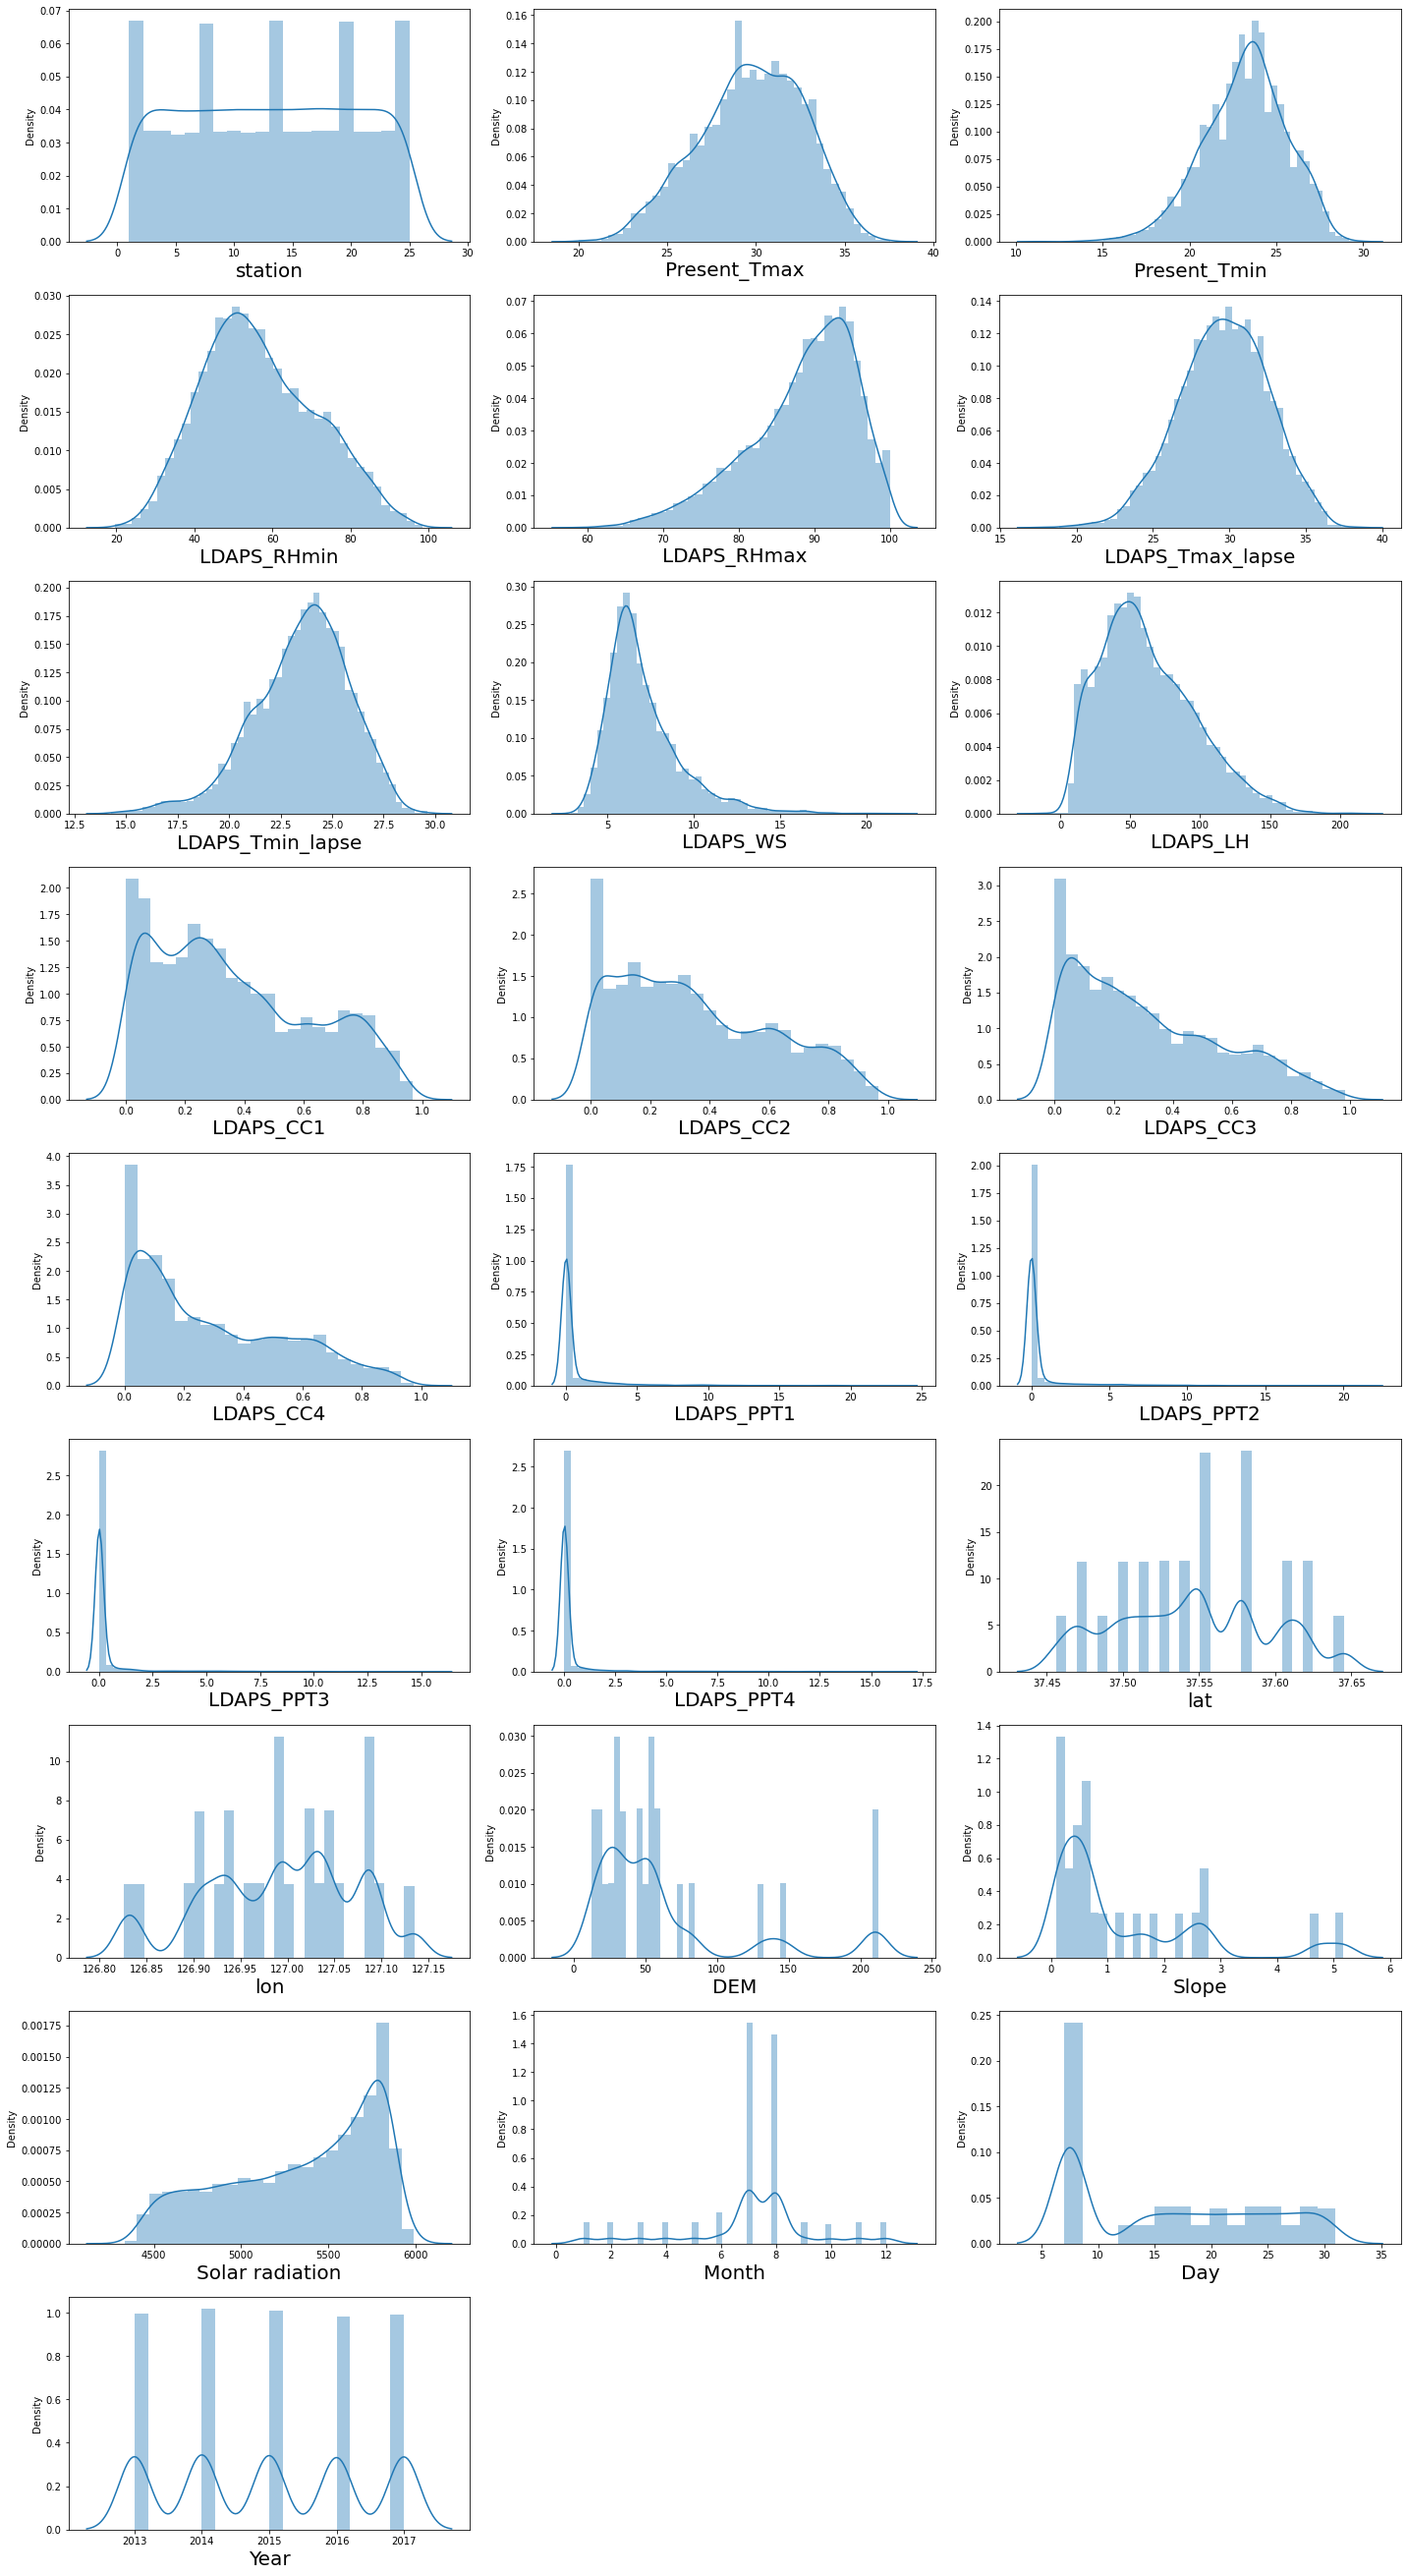

In [38]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET

In [39]:
#Checking skewness of the features
X.skew().sort_values(ascending=False)

LDAPS_PPT4          6.681256
LDAPS_PPT3          6.356670
LDAPS_PPT2          5.710360
LDAPS_PPT1          5.305906
DEM                 1.721617
Slope               1.559050
LDAPS_WS            1.553926
LDAPS_CC4           0.663815
LDAPS_LH            0.662971
LDAPS_CC3           0.639649
LDAPS_CC2           0.473929
LDAPS_CC1           0.456716
LDAPS_RHmin         0.301396
Day                 0.245563
lat                 0.085377
Year                0.013575
station            -0.004178
LDAPS_Tmax_lapse   -0.222349
Present_Tmax       -0.257069
lon                -0.289048
Present_Tmin       -0.353822
Solar radiation    -0.524325
LDAPS_Tmin_lapse   -0.574035
Month              -0.703092
LDAPS_RHmax        -0.845264
dtype: float64

In [40]:
#We can see skewness in few of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
X_new = power_transform(X)
X=pd.DataFrame(X_new,columns=X.columns)
X.skew().sort_values(ascending=False) #validating that the skewness is removed

LDAPS_PPT4          2.041426
LDAPS_PPT3          1.814526
LDAPS_PPT2          1.637689
LDAPS_PPT1          1.451770
Year                0.409648
Slope               0.233968
LDAPS_CC4           0.129974
LDAPS_CC3           0.091156
lat                 0.068584
LDAPS_CC1           0.048221
LDAPS_CC2           0.047595
Month               0.043710
DEM                 0.039591
LDAPS_LH            0.028141
LDAPS_WS            0.005937
LDAPS_Tmax_lapse   -0.012155
Present_Tmin       -0.014363
LDAPS_RHmin        -0.018008
LDAPS_Tmin_lapse   -0.021647
Present_Tmax       -0.036516
Day                -0.041461
LDAPS_RHmax        -0.120174
Solar radiation    -0.182349
lon                -0.202301
station            -0.206291
dtype: float64

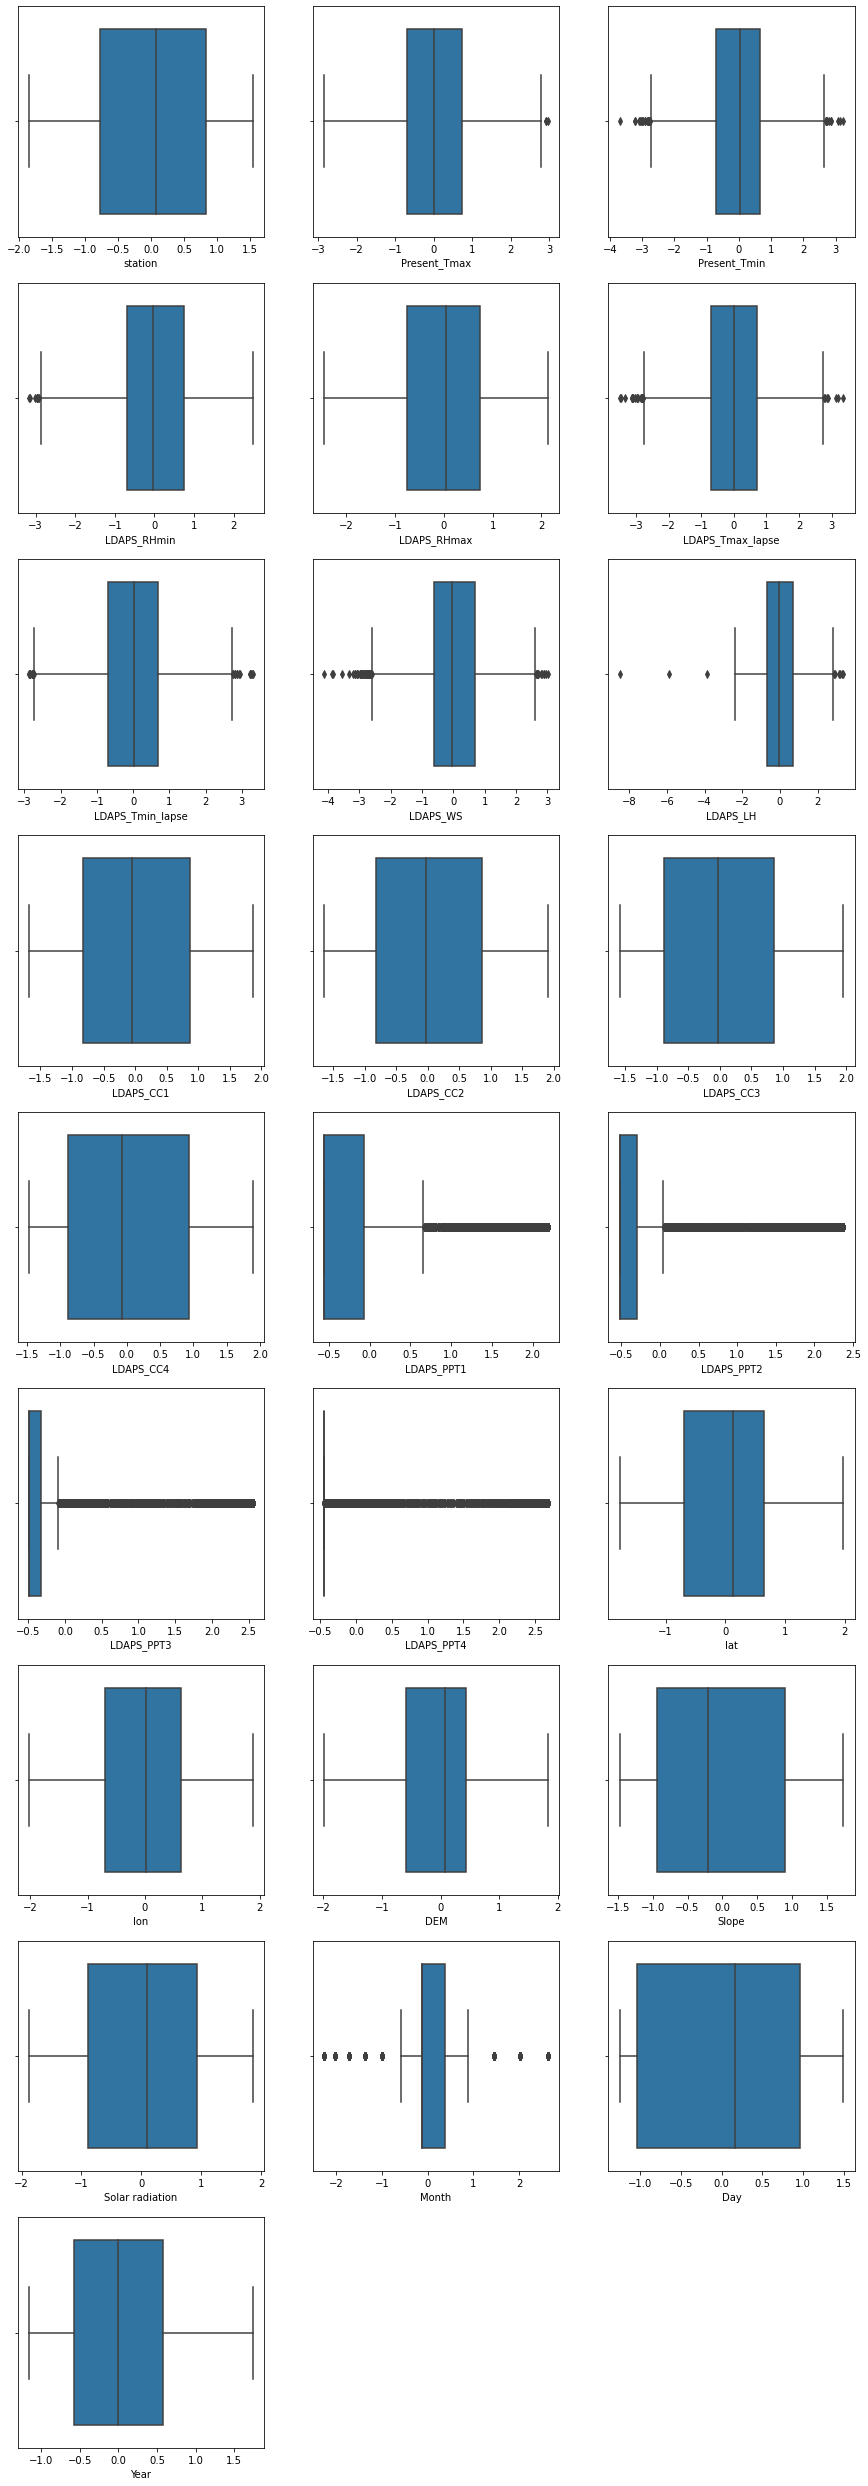

In [41]:
#Visualizing the outliers using BOXPLOT

plt.figure(figsize=(15,50))
graph=1

for column in X:
	if graph<=30: 
		ax=plt.subplot(10,3,graph)
		sns.boxplot(X[column],orient='v')
		plt.xlabel(column,fontsize=10)
	graph+=1
plt.show()

In [42]:
#Data Scaling
scaler = StandardScaler()
X= scaler.fit_transform(X)

# APPLYING REGRESSION MODELS & FINDING BEST FIT MODEL

In [43]:
#we will use LinearRegression, DecisionTree Regressor, Random Forest Regressor :- these work directly over multi-output regressions

In [44]:
model_name=[]
r2_scores=[]
rmse_value=[]
cvs=[]

In [45]:
#Finding best random_state
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
maxAccu=0 #maximum R2SCORE
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(0,100):
	x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
	lr.fit(x_train,y_train)
	y_pred_train=lr.predict(x_train)
	y_pred=lr.predict(x_test)
	acc = r2_score(y_test,y_pred)
	if acc>maxAccu:
		maxAccu=acc
		maxRS=i
print("Best r2score is", maxAccu,"on Random State", maxRS)

Best r2score is 0.8232768790802077 on Random State 60


In [46]:
#CREATING TRAIN-TEST SPLIT
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=60)

R2Score : 81.00501745018418
MAE: 0.9551672818444905
MSE: 1.6131082693941576
RMSE: 1.270081993177668


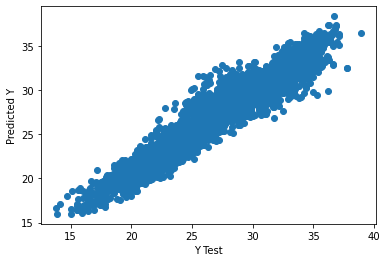

In [47]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score :",r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
scr = cross_val_score(lr,X,y,cv=5)
model_name.append('Linear Regression')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
cvs.append(scr.mean())

R2Score: 78.36064945755035
MAE: 0.9755160298638546
MSE: 1.7576043039086517
RMSE: 1.3257466967368434


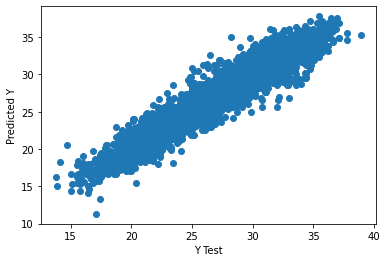

In [48]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score:", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
scr2 = cross_val_score(dtr,X,y,cv=5)
model_name.append('Decision Tree Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
cvs.append(scr2.mean())

R2Score:  90.67895025969574
MAE: 0.6516969696969697
MSE: 0.7621157979797974
RMSE: 0.8729924386727513


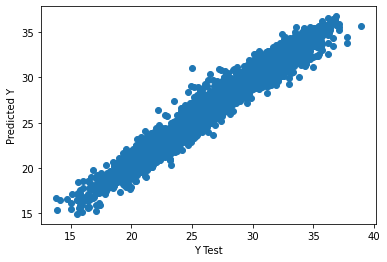

In [49]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
y_pred=rdr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score: ", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
scr3 = cross_val_score(rdr,X,y,cv=5)
model_name.append('Random Forest Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
cvs.append(scr3.mean())

In [50]:
#SVR
from sklearn.svm import SVR
svr = SVR()

In [51]:
#SVR does not work directly over multioutput regression problems, hence we will make use of MultiOutputRegressor for SVR

R2Score:  90.77808298596806
MAE: 0.6420693273191601
MSE: 0.777121731288311
RMSE: 0.8815450818241294


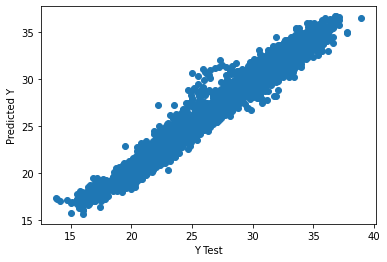

In [52]:
#MultiOutput Regressor
from sklearn.multioutput import MultiOutputRegressor
mor_svr = MultiOutputRegressor(svr)
mor_svr.fit(x_train,y_train)
y_pred=mor_svr.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score: ", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
scr4 = cross_val_score(mor_svr,X,y,cv=5)
model_name.append('SVR')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
cvs.append(scr4.mean())

In [53]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [54]:
#AdaBoost does not work directly over multioutput regression problems, hence we will make use of MultiOutputRegressor for AdaBoost

R2Score:  79.55901431736164
MAE: 1.0369227915357537
MSE: 1.709519876304138
RMSE: 1.3074860902908825


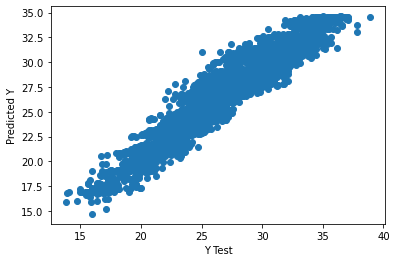

In [55]:
#MultiOutput Regressor
from sklearn.multioutput import MultiOutputRegressor
mor_ada = MultiOutputRegressor(ada)
mor_ada.fit(x_train,y_train)
y_pred=mor_ada.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score: ", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
scr5 = cross_val_score(mor_ada,X,y,cv=5)
model_name.append('ADA Boost Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
cvs.append(scr5.mean())

In [56]:
#XGB
import xgboost as xgb
xgb = xgb.XGBRegressor()

In [57]:
#XGboost does not work directly over multioutput regression problems, hence we will make use of MultiOutputRegressor for XGboost

In [ ]:
#MultiOutput Regressor
from sklearn.multioutput import MultiOutputRegressor
mor = MultiOutputRegressor(xgb)
mor.fit(x_train,y_train)
y_pred=mor.predict(x_test)
r2score=r2_score(y_test,y_pred)*100
print("R2Score: ", r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )
scr6 = cross_val_score(mor,X,y,cv=5)
model_name.append('XGBoost Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
cvs.append(scr6.mean())

R2Score:  93.65513505467706
MAE: 0.5433558761419104
MSE: 0.522461163096468
RMSE: 0.7228147501929301


In [ ]:
import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value
Regression_Scores['Cross Value Score'] = cvs
Regression_Scores

In [ ]:
#XGBoost Regresor has the best R2Score and CVscore

In [ ]:
plt.scatter(x=y_test,y=y_pred,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBRegressor')

In [ ]:
#For multiOutput Regression problems we would not be doing the Gridsearch

# SAVE THE MODEL

In [ ]:
import joblib
joblib.dump(mor,'Customer_Churn_Analysis.obj')